# Module 13: Multiple Linear Regression and Polynomial Regression

This notebook contains all coding parts for Module 13 using a real world dataset from `scikit-learn`.

We will work through the following sections:
1. Section 0: Setup and Data Loading
2. Section 1: Introduction to Multiple Linear Regression (Notebook part)
3. Section 3: Coding Multiple Linear Regression on Real Data
4. Section 4: Introduction to Polynomial Regression (Notebook part)
5. Section 6: Coding Polynomial Regression on Real Data

Sections 2 and 5 are math and concept heavy, so those will be handled in slides, not in this notebook.

## Section 0: Setup and Data Loading

In this section we:
- Import all required libraries
- Load the California Housing dataset from `scikit-learn`
- Wrap it into a pandas DataFrame
- Inspect the basic structure and summary statistics

The California Housing dataset is based on real census information, so it is a good example of a real world regression problem.

In [1]:
# Section 0: Setup - Import libraries

import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True


In [2]:
# Load the California Housing dataset

california = fetch_california_housing(as_frame=True)

# `california.frame` is a pandas DataFrame that already includes
# both the features and the target column

df = california.frame.copy()

print(df.shape)
df.head(10)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**Feature Descriptions:**

1. **MedInc:** Median income of households in the block (measured in tens of thousands of US dollars).

2. **HouseAge:** Median age of the houses in the block (in years).

3. **AveRooms:** Average number of rooms per household in the block.

4. **AveBedrms:** Average number of bedrooms per household in the block.

5. **Population:** Total number of people living in the block.

6. **AveOccup:** Average number of occupants per household in the block.

7. **Latitude:** Geographic latitude of the block; higher values indicate farther north.

8. **Longitude:** Geographic longitude of the block; higher values indicate farther west.

9. **MedHouseVal:** Median house value for households in the block (in US dollars).

In [3]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Summary statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Section 1: Introduction to Multiple Linear Regression (Notebook part)

In multiple linear regression, we use several input features together to predict a single numeric target.

In this dataset:
- **Target (y)**: `MedHouseVal` (median house value in a block)
- **Candidate features (X)**: income, house age, average rooms, average bedrooms, population, average occupancy

In this section we will:
- Select a subset of features as our input matrix `X`
- Set `MedHouseVal` as the target `y`
- Inspect the shapes
- Look at simple correlations to build intuition about relationships

In [5]:
# Define target and feature columns

target_col ='MedHouseVal'

feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

X = df[feature_cols]
y = df[target_col]

X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [6]:
# Check shapes of X and y

print('Shape of X: ', X.shape)  # (number_of_rows, number_of_features)
print('Shape of y: ', y.shape)  # (number_of_rows,)

Shape of X:  (20640, 6)
Shape of y:  (20640,)


Correlation matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


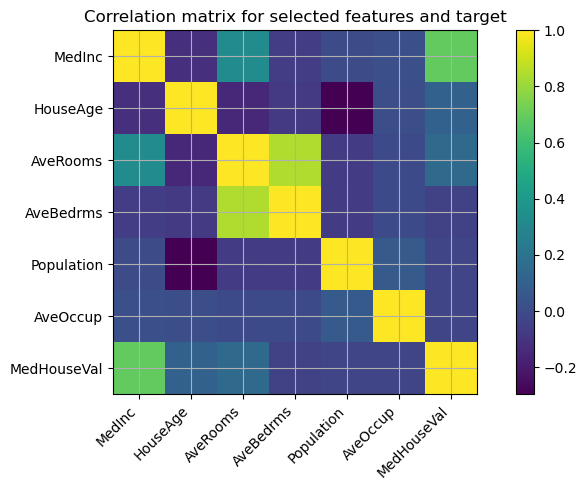

In [7]:
# Simple correlation matrix between selected features and the target
corr_matrix = df[feature_cols + [target_col]].corr()
print("Correlation matrix: ")
print(corr_matrix)


# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

## Section 3: Coding Multiple Linear Regression on Real Data

In this section we implement a full workflow for multiple linear regression:

1. Split the data into training and test sets
2. Fit a `LinearRegression` model on the training data
3. Inspect the learned coefficients and intercept
4. Make predictions on train and test sets
5. Evaluate the model using MAE, RMSE, and R squared
6. Visualize predicted vs actual values
7. Plot residuals to check basic patterns

We will use the feature matrix `X` and target `y` defined in Section 1.

In [8]:
# Step 1: Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size: ", X_train.shape[0], "rows")
print("Test set size: ", X_test.shape[0], "rows")

Training set size:  16512 rows
Test set size:  4128 rows


In [9]:
# Step 2: Create and fit the Linear Regression model
lin_reg = LinearRegression()


# .fit() learns the best coefficients from the training data
lin_reg.fit(X_train, y_train)
print('Model fitted successfully')

Model fitted successfully


In [10]:
# Step 3: Inspect learned parameters (coefficients and intercept)
print('Intercept (bias term): ', lin_reg.intercept_)
print('\nCoefficients: ')
for feature_name, coef in zip(feature_cols, lin_reg.coef_):
  print(f'{feature_name}: {coef}')

Intercept (bias term):  -0.5528727644615614

Coefficients: 
MedInc: 0.546160779107424
HouseAge: 0.016787909062567642
AveRooms: -0.22391994400479812
AveBedrms: 1.1154926114808357
Population: 2.3167197368248078e-05
AveOccup: -0.00461823134540709


In [11]:
# Step 4: Make predictions on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print('Some sample predicitons on test set (first 5 rows): ')
print('Predicted: ', y_test_pred[:5])
print('Actual: ', y_test.values[:5])

Some sample predicitons on test set (first 5 rows): 
Predicted:  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual:  [0.477   0.458   5.00001 2.186   2.78   ]


In [12]:
# Step 5: Define a helper function to print evaluation metrics
def regression_metrics(y_true, y_pred, label='Model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'=== {label} ====')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2)
  print()

# Evaluate on train and test
regression_metrics(y_train, y_train_pred, label='Linear Regression (Train)')
regression_metrics(y_test, y_test_pred, label='Linear Regression (Test)')

=== Linear Regression (Train) ====
MAE:  0.5708698051066731
RMSE:  0.7791080690513484
R2 :  0.5459161602818385

=== Linear Regression (Test) ====
MAE:  0.5792140665454439
RMSE:  0.801365853685747
R2 :  0.5099337366296423



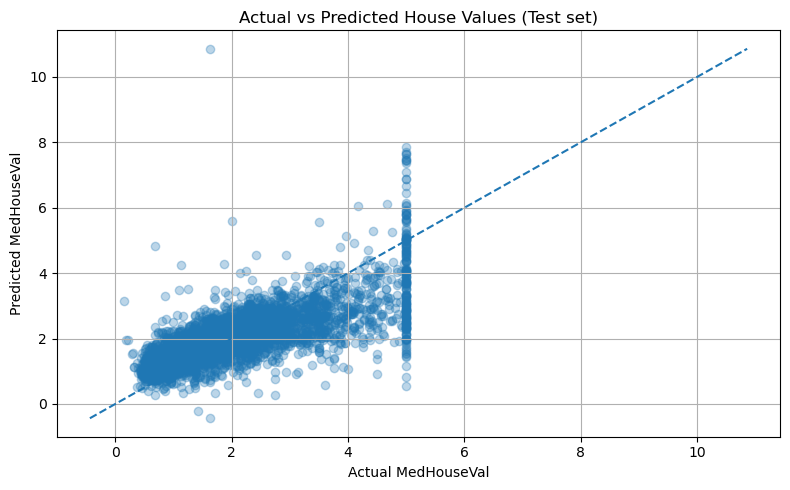

In [13]:
# Step 6: Plot predicted vs actual values on the test set

plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted House Values (Test set)')

# Diagonal reference line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

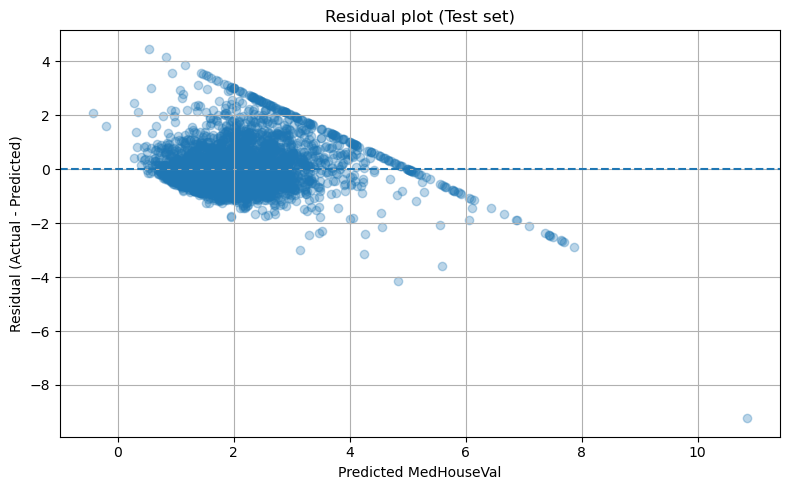

In [14]:
# Step 7: Residual plot (errors = actual - predicted)

residuals = y_test - y_test_pred

plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual plot (Test set)')
plt.tight_layout()
plt.show()


## Section 4: Introduction to Polynomial Regression (Notebook part)

Polynomial regression keeps the model **linear in parameters** but allows nonlinear relationships between the input feature and the target by adding polynomial terms.

In this notebook part we:
- Use a **single feature** `MedInc` (median income) to predict `MedHouseVal`
- Fit a simple **linear model** on this single feature
- Visualize the linear fit

Later, in Section 6, we will extend this to polynomial regression using `PolynomialFeatures` and `Pipeline`.

In [15]:
# Prepare a single feature for illustration: MedInc vs MedHouseVal

X_single = df[['MedInc']]  # DataFrame with one column
y_single = df[target_col]

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

print('Single feature training shape:', X_single_train.shape)
print('Single feature test shape    :', X_single_test.shape)

Single feature training shape: (16512, 1)
Single feature test shape    : (4128, 1)


In [16]:
# Fit a simple Linear Regression model using only MedInc
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single_train, y_single_train)
y_single_test_pred = lin_reg_single.predict(X_single_test)

regression_metrics(y_single_test, y_single_test_pred, label='Single Feature Linear Regression (Test)')

=== Single Feature Linear Regression (Test) ====
MAE:  0.629908653009376
RMSE:  0.8420901241414454
R2 :  0.45885918903846656



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


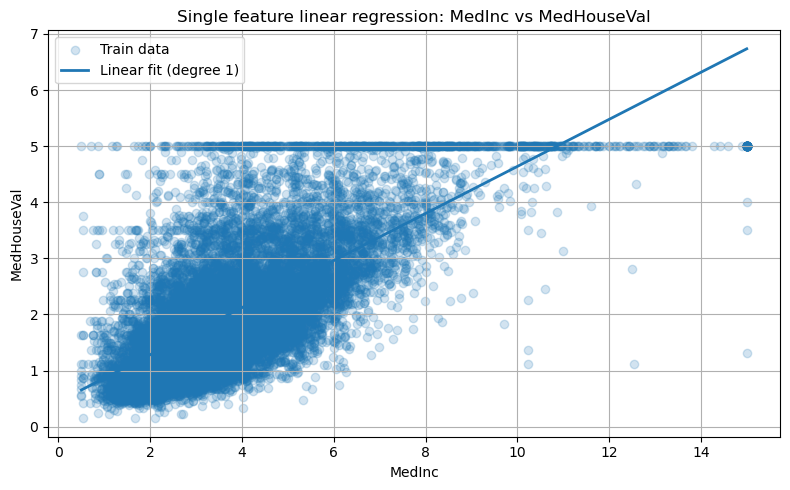

In [35]:
# Visualize the linear fit for the single feature model

# Create a grid of MedInc values for a smooth line
X_plot = np.linspace(X_single['MedInc'].min(), X_single['MedInc'].max(), 200).reshape(-1, 1)

y_plot_lin = lin_reg_single.predict(X_plot)

plt.figure()
plt.scatter(X_single_train['MedInc'], y_single_train, alpha=0.2, label='Train data')
plt.plot(X_plot, y_plot_lin, linewidth=2, label='Linear fit (degree 1)')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Single feature linear regression: MedInc vs MedHouseVal')
plt.legend()
plt.tight_layout()
plt.show()

## Section 6: Coding Polynomial Regression on Real Data

In this section we:

- Use the same single feature `MedInc`
- Create polynomial features of different degrees (1, 2, 3, and 5)
- Fit a linear regression model on these expanded features using `Pipeline`
- Compare performance (R squared and RMSE) for each degree
- Visualize how the fitted curves change with degree and discuss overfitting

Key new tools:
- `PolynomialFeatures`: expands original features into polynomial combinations
- `Pipeline`: chains polynomial expansion and linear regression into one convenient object

In [46]:
# Compare polynomial regression models of different degrees on the single feature MedInc

degrees = [1,2,3,5]
results = []
for deg in degrees :
    model = Pipeline([
        ('poly', PolynomialFeatures(degree = deg, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])

    model.fit(X_single_train, y_single_train)
    y_train_pred_deg = model.predict(X_single_train)
    y_test_pred_deg = model.predict(X_single_test)

    mae_train = mean_absolute_error(y_single_train, y_train_pred_deg)
    rmse_train = np.sqrt(mean_squared_error(y_single_train,y_train_pred_deg))
    r2_train = r2_score(y_single_train,y_train_pred_deg)


    mae_test = mean_absolute_error(y_single_test, y_test_pred_deg)
    rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred_deg))
    r2_test = r2_score(y_single_test, y_test_pred_deg)


    results.append({
        'degree' : deg,
        'MAE_train': mae_train,
        'RMSE_train': rmse_train, 
        'R2_train' : r2_train,
        'MAE_test': mae_test,
        'RMSE_test': rmse_test, 
        'R2_ttest' : r2_test,
    })

    results_df= pd.DataFrame(results)
    results_df
    

In [33]:
print("Tanvir")

Tanvir


In [19]:
# Plot R squared and RMSE vs polynomial degree



# R squared plot


# RMSE plot



### Optional: Polynomial Regression with Two Features

The main ideas can also extend to more than one feature. As an optional extension, we can use two features
`MedInc` and `HouseAge` together with polynomial degree 2.

In [40]:
# Optional block: polynomial regression with two features (degree 2)

feature_cols_two = ['MedInc', 'HouseAge']
X_two = df[feature_cols_two]

X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    X_two, y, test_size=0.2, random_state=42
)

deg = 2

poly_model_two = Pipeline([
    ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_model_two.fit(X_two_train, y_two_train)

y_two_test_pred = poly_model_two.predict(X_two_test)

regression_metrics(y_two_test, y_two_test_pred,
                   label='Polynomial regression (degree 2, two features)')

=== Polynomial regression (degree 2, two features) ====
MAE:  0.6013064394142872
RMSE:  0.806203871690102
R2 :  0.5039986038552433



In [21]:
# All features
X_all = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# Polynomial Regression (degree 2) with all features
degree = 2

poly_all_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_all_model.fit(X_all_train, y_all_train)

y_all_test_pred = poly_all_model.predict(X_all_test)

# Evaluation
regression_metrics(y_all_test, y_all_test_pred,
                   label='Polynomial Regression (degree 2, ALL features)')


=== Polynomial Regression (degree 2, ALL features) ====
MAE:  0.467000933246939
RMSE:  0.6813967441594299
R2 :  0.6456819735970121

